In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import spacy
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
import tqdm
import pickle 
import pyLDAvis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethanmeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/ethanmeng/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df_1 = pd.read_excel('ChaseDreamMSBA10.xlsx')
df_2 = pd.read_excel('ChaseDreamMSBA11_19.xlsx')
df_3 = pd.read_excel('ChaseDreamMSBA20_25.xlsx')
df_4 = pd.read_excel('ChaseDreamMSBA26_30.xlsx')
df_5 = pd.read_excel('ChaseDreamMSBA31_35.xlsx')
df_6 = pd.read_excel('ChaseDreamMSBA36_40.xlsx')
df_7 = pd.read_excel('ChaseDreamMSBA41_45.xlsx')
df_8 = pd.read_excel('ChaseDreamMSBA46_50.xlsx')
df_9 = pd.read_excel('ChaseDreamMSBA51_55.xlsx')
df_10 = pd.read_excel('ChaseDreamMSBA56_60.xlsx')
df_11 = pd.read_excel('ChaseDreamMSBA61_65.xlsx')
df_12 = pd.read_excel('ChaseDreamMSBA66_70.xlsx')
df_13 = pd.read_excel('ChaseDreamMSBA71_75.xlsx')
df_14 = pd.read_excel('ChaseDreamMSBA76_80.xlsx')
df_15 = pd.read_excel('ChaseDreamMSBA81_84.xlsx')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15], ignore_index = True)
df.drop('Unnamed: 0', inplace=True, axis=1)
#df['DatesTime'] = pd.to_datetime(ucddf['Dates'], format='%Y-%m-%d %H:%M')
df

,Dates,Titles,Contents,link
0,2020-4-16 11:32,NEU CS Align 西雅图校区/Miami 迈阿密 SMU MSBA（附面经）【已选N...,因为SMU和Miami一个4.20交deposit一个5.1交deposit 所以想来问问大...,https://forum.chasedream.com/forum.php?mod=vie...
1,2016-3-23 11:26,老年人的最后挣扎：Duke MMS:FOB VS USC MSBA - 商学院Master申请区,随着Duke出offer，decline了IMC面试，申请季也介绍了。特别感谢CD，还有BA...,https://forum.chasedream.com/forum.php?mod=vie...
2,2020-2-1 01:07,美英坡MSBA:UR UCD WUSTL NTU南洋理工选校 - 商学院Master申请区,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,https://forum.chasedream.com/forum.php?mod=vie...
3,2019-4-27 16:20,UR MSBA/BU MET MSABA/GWU MSBA/JHU BARM 求BA选校建议...,更新 5.22 已定 UR BA 专业，学校后来又补了10%的scholarship，很开心...,https://forum.chasedream.com/forum.php?mod=vie...
4,2022-1-15 20:02,MSBA@UIUC\RSM\UW-MADISON MSADA@NTU\IUB 【选校】 - ...,帮亲戚小朋友DIY申请，目前到手OFFER如下（隐藏BG回复可见）：游客，如果您要查看本帖隐...,https://forum.chasedream.com/forum.php?mod=vie...
...,...,...,...,...
4995,2015-1-31 02:15,UMN MSBA 新鲜面筋～～～［已录取］ - 商学院Master申请区,\n感觉聊得还是挺开心的，Zuzana人还是比较nice的。\n1、说说internship...,https://forum.chasedream.com/forum.php?mod=vie...
4996,2015-2-3 02:43,UMN-MSBA-R2-热腾腾面经（不过料还是老料）+ 小插曲客官来乐呵乐呵吧 - 商学院M...,\r\n在UMN各种曲折终于材料全了后，终于迎来了面试当当当当！（你倒是表现好一点啊摔!）\...,https://forum.chasedream.com/forum.php?mod=vie...
4997,2015-2-12 04:24,RPI Lally school MSBA 面经 另寻已录取同学～～ - 商学院Master申请区,\r\n上周二美东部时间晚上9点面的，但是上周考试太多了，现在才po上来，希望对有兴趣的同学...,https://forum.chasedream.com/forum.php?mod=vie...
4998,2015-2-5 22:12,面经同时求比较RPI MSBA vs. 雪城 MSF！感谢！ - 商学院Master申请区,\r\nRPI 2/2 面的，Dorit Nevo，挺简单的\r\n先是家长里短唠了些，然后...,https://forum.chasedream.com/forum.php?mod=vie...


In [4]:
df.to_csv('ChaseDreamMSBAAllInfo.csv')

In [5]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m-%d %H:%M')
countdf = df.groupby([df['Dates'].dt.year]).count()
countdf = countdf['Contents']
countdf

Dates
2015      71
2016     250
2017     537
2018    1000
2019    1343
2020    1268
2021     501
2022      22
Name: Contents, dtype: int64

<AxesSubplot:xlabel='Dates'>

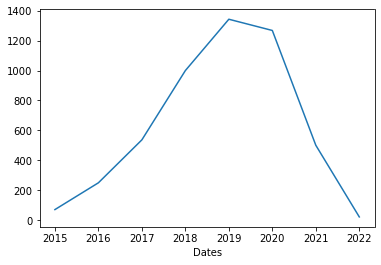

In [6]:
countdf.plot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dates     5000 non-null   datetime64[ns]
 1   Titles    5000 non-null   object        
 2   Contents  4992 non-null   object        
 3   link      5000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 156.4+ KB


In [8]:
df = df.loc[:,'Contents'].to_frame()
len(df.Contents.unique())

3175

In [9]:
df.dropna(subset = ['Contents'],inplace = True)
df

,Contents
0,因为SMU和Miami一个4.20交deposit一个5.1交deposit 所以想来问问大...
1,随着Duke出offer，decline了IMC面试，申请季也介绍了。特别感谢CD，还有BA...
2,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...
3,更新 5.22 已定 UR BA 专业，学校后来又补了10%的scholarship，很开心...
4,帮亲戚小朋友DIY申请，目前到手OFFER如下（隐藏BG回复可见）：游客，如果您要查看本帖隐...
...,...
4995,\n感觉聊得还是挺开心的，Zuzana人还是比较nice的。\n1、说说internship...
4996,\r\n在UMN各种曲折终于材料全了后，终于迎来了面试当当当当！（你倒是表现好一点啊摔!）\...
4997,\r\n上周二美东部时间晚上9点面的，但是上周考试太多了，现在才po上来，希望对有兴趣的同学...
4998,\r\nRPI 2/2 面的，Dorit Nevo，挺简单的\r\n先是家长里短唠了些，然后...


# Tokenization 

In [10]:
#Packages for Chinese NLP
#!pip install snownlp
from snownlp import SnowNLP 

In [4]:
#!pip install jieba
import jieba  

#!pip install stopwordsiso
import stopwordsiso
from stopwordsiso import stopwords

In [1]:
my_stopwords = list(stopwords(["zh"]))
english_stopwords = nltk.corpus.stopwords.words('English')
for i in english_stopwords:
    my_stopwords.append(i)
my_stopwords.append("项目")
my_stopwords.append("想")
my_stopwords.append("个")
my_stopwords.append("这")
my_stopwords.append("有")
my_stopwords.append("没有")
my_stopwords.append("没")
my_stopwords.append("找")
my_stopwords.append("两")
my_stopwords.append("楼")
my_stopwords.append("主")
my_stopwords.append("工作")
my_stopwords.append("课程")
my_stopwords.append("学校")
my_stopwords.append("lz")
my_stopwords.append("问题")
my_stopwords.append("可能")
my_stopwords.append("这")
my_stopwords.append("已经")
my_stopwords.append("很多")
my_stopwords.append("实习")
my_stopwords.append("一下")
my_stopwords.append("希望")
my_stopwords.append("问")
my_stopwords.append("没")
my_stopwords.append("挺")
my_stopwords.append("老师")
my_stopwords.append("觉得")
my_stopwords.append("感觉")
my_stopwords.append("学生")
my_stopwords.append("分析")
my_stopwords.append("MSBA")
my_stopwords.append("BA")
my_stopwords.append("面")
my_stopwords.append("美")
my_stopwords.append("申请")
my_stopwords.append("收到")
my_stopwords.append("学")
my_stopwords.append("太")
my_stopwords.append("高")
my_stopwords.append("里")
my_stopwords.append("知道")
my_stopwords.append("届")
my_stopwords.append("非常")
my_stopwords.append("submit")
my_stopwords.append("submit")
my_stopwords.append("一点")
my_stopwords.append("program")
my_stopwords.append("同学")
my_stopwords.append("时间")
my_stopwords.append("文书")
my_stopwords.append("分享")
my_stopwords.append("了解")
my_stopwords.append("面试")
my_stopwords.append("offer")
my_stopwords.append("interview")
my_stopwords.append("申")
my_stopwords.append("/")
my_stopwords.append("大概")
my_stopwords.append("应该")
my_stopwords.append("录取")
my_stopwords.append("第一")
my_stopwords.append("关")
my_stopwords.append("金融业")
my_stopwords.append("公司")
my_stopwords.append("基本")
my_stopwords.append("更新")
my_stopwords.append("选择")
my_stopwords.append("真的")
my_stopwords.append("经历")
my_stopwords.append("求")
my_stopwords.append("毕业")
my_stopwords.append("提交")
my_stopwords.append("行业")
my_stopwords.append("企业")
my_stopwords.append("之前")
my_stopwords.append("现在")
my_stopwords.append("最后")
my_stopwords.append("目前")
my_stopwords.append("之后")
my_stopwords.append("选")
my_stopwords.append("话")
my_stopwords.append("其实")
my_stopwords.append("种")
my_stopwords.append("讲")
my_stopwords.append("ba")
my_stopwords.append("天")
my_stopwords.append("(")
my_stopwords.append(")")
my_stopwords.append("（")
my_stopwords.append(" ）")
my_stopwords.append("-")
my_stopwords.append("?")
my_stopwords.append("!")
my_stopwords.append("+")
my_stopwords.append(",")
my_stopwords.append("。")
my_stopwords.append("~")
my_stopwords.append("what")
my_stopwords.append("us")
my_stopwords.append("would")
my_stopwords.append("招")
my_stopwords.append("段")
my_stopwords.append("完")
my_stopwords.append("优")
my_stopwords.append("是否")
my_stopwords.append("里面")
my_stopwords.append("是否")
my_stopwords.append("干")
my_stopwords.append("招生")
my_stopwords.append("交")
my_stopwords.append("cd")
my_stopwords.append("写")
my_stopwords.append("写出")
my_stopwords.append("学期")
my_stopwords.append("每个")

my_stopwords.append("msba")
my_stopwords.append("ChaseDream")
my_stopwords.append("Business")
my_stopwords.append("Analytics")
my_stopwords.append("How")
my_stopwords.append("What")
my_stopwords.append("Why")

In [13]:
def snow_tokenization(content):
    try:
        content = content.replace("\r\n", "")
        content = content.replace(".", "")
        content_han = SnowNLP(content).han
    except ZeroDivisionError:
        return None
    
    content_seg = SnowNLP(content_han).words
    tokens = []
    for word in content_seg:
        if word not in my_stopwords and not word.isdigit():
            tokens.append(word)
    
    return ' '.join(tokens)
    

df['content_snow'] = df['Contents'].map(lambda x: snow_tokenization(x))
df

,Contents,content_snow
0,因为SMU和Miami一个4.20交deposit一个5.1交deposit 所以想来问问大...,SMU Miami deposit deposit 想来 问问 选校 意见 （neu cs ...
1,随着Duke出offer，decline了IMC面试，申请季也介绍了。特别感谢CD，还有BA...,Duke 出 offer，decline IMC 季 介绍 特别 感谢 CD， 群群 小伙伴...
2,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,美国 新加坡 英国 混 英国 今年 形势 估计 机会 罗村 UCD WUSTL JHU 南洋...
3,更新 5.22 已定 UR BA 专业，学校后来又补了10%的scholarship，很开心...,定 UR 专业 后来 补 10% scholarship， 开心 满意 决定 谢谢 CDer...
4,帮亲戚小朋友DIY申请，目前到手OFFER如下（隐藏BG回复可见）：游客，如果您要查看本帖隐...,帮 亲戚 小朋友 DIY 到手 OFFER 隐藏 BG 回复 ）： 游客 查看 本帖 隐藏 ...
...,...,...
4995,\n感觉聊得还是挺开心的，Zuzana人还是比较nice的。\n1、说说internship...,聊 开心 ，Zuzana 比较 nice 1、 说说 internship 内容 2、int...
4996,\r\n在UMN各种曲折终于材料全了后，终于迎来了面试当当当当！（你倒是表现好一点啊摔!）\...,UMN 曲折 终于 材料 全 终于 迎来 当当当 ！（ 倒是 表现 摔 !） 个小 插曲 约...
4997,\r\n上周二美东部时间晚上9点面的，但是上周考试太多了，现在才po上来，希望对有兴趣的同学...,上周 东部 晚上 上周 考试 po 上来 兴趣 有点 帮助 半 小时 pengfei ye ...
4998,\r\nRPI 2/2 面的，Dorit Nevo，挺简单的\r\n先是家长里短唠了些，然后...,RPI 2/2 ，Dorit Nevo， 简单 的先 家长 短 唠 background， ...


In [14]:
# def jieba_tokenization(content):
#     content = content.replace("\r\n", "")
#     content = content.replace("\n", "")
#     content = content.replace("\r", "")
#     content_seg = jieba.cut(content)
#     tokens = []
#     for word in content_seg:
#         if word not in my_stopwords and not word.isdigit():
#             tokens.append(word)
#     return tokens

# df['content_jieba'] = df['Contents'].map(lambda x: " ".join(jieba_tokenization(x)))
# df

both has some advantages and disadvantages

# Create LDA models

## SnowNLP

In [15]:
df = df[df['content_snow'].notna()]
# Create Dictionary
dictionary = corpora.Dictionary(d.split() for d in df['content_snow'])
# Create Corpus
texts = [d.split() for d in df['content_snow']]
# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 2), (11, 6), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 2), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 2), (70, 1), (71, 1), (72, 2), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 5), (82, 4), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 5), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [16]:
df

,Contents,content_snow
0,因为SMU和Miami一个4.20交deposit一个5.1交deposit 所以想来问问大...,SMU Miami deposit deposit 想来 问问 选校 意见 （neu cs ...
1,随着Duke出offer，decline了IMC面试，申请季也介绍了。特别感谢CD，还有BA...,Duke 出 offer，decline IMC 季 介绍 特别 感谢 CD， 群群 小伙伴...
2,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,美国 新加坡 英国 混 英国 今年 形势 估计 机会 罗村 UCD WUSTL JHU 南洋...
3,更新 5.22 已定 UR BA 专业，学校后来又补了10%的scholarship，很开心...,定 UR 专业 后来 补 10% scholarship， 开心 满意 决定 谢谢 CDer...
4,帮亲戚小朋友DIY申请，目前到手OFFER如下（隐藏BG回复可见）：游客，如果您要查看本帖隐...,帮 亲戚 小朋友 DIY 到手 OFFER 隐藏 BG 回复 ）： 游客 查看 本帖 隐藏 ...
...,...,...
4995,\n感觉聊得还是挺开心的，Zuzana人还是比较nice的。\n1、说说internship...,聊 开心 ，Zuzana 比较 nice 1、 说说 internship 内容 2、int...
4996,\r\n在UMN各种曲折终于材料全了后，终于迎来了面试当当当当！（你倒是表现好一点啊摔!）\...,UMN 曲折 终于 材料 全 终于 迎来 当当当 ！（ 倒是 表现 摔 !） 个小 插曲 约...
4997,\r\n上周二美东部时间晚上9点面的，但是上周考试太多了，现在才po上来，希望对有兴趣的同学...,上周 东部 晚上 上周 考试 po 上来 兴趣 有点 帮助 半 小时 pengfei ye ...
4998,\r\nRPI 2/2 面的，Dorit Nevo，挺简单的\r\n先是家长里短唠了些，然后...,RPI 2/2 ，Dorit Nevo， 简单 的先 家长 短 唠 background， ...


In [17]:
# Build LDA model
lda_model_snow = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [18]:
from pprint import pprint

pprint(lda_model_snow.print_topics())
doc_lda = lda_model_snow[corpus]

[(0,
  '0.012*"群" + 0.011*"数据" + 0.007*"小伙伴" + 0.005*"专业" + 0.005*"微" + 0.005*"信" + '
  '0.004*"refer" + 0.004*"美国" + 0.004*"背景" + 0.004*"排名"'),
 (1,
  '0.005*"–" + 0.004*"要求" + 0.003*"initialview" + 0.003*"专业" + 0.002*"大学" + '
  '0.002*"排名" + 0.002*"成绩" + 0.002*"需要" + 0.002*"比较" + 0.002*"MSAN"'),
 (2,
  '0.011*"课" + 0.007*"门" + 0.007*"比较" + 0.006*"数据" + 0.005*"学习" + 0.004*"统计" + '
  '0.004*"需要" + 0.004*"专业" + 0.004*"主要" + 0.003*"就业"'),
 (3,
  '0.007*"推荐" + 0.005*"student" + 0.005*"The" + 0.004*"company" + 0.003*"team" '
  '+ 0.003*"准备" + 0.003*"信" + 0.003*"data" + 0.003*"道" + 0.003*"skills"'),
 (4,
  '0.003*"UN" + 0.002*"students" + 0.002*"hardest" + 0.002*"Tell" + 0.001*"删" '
  '+ 0.001*"working" + 0.001*"追加" + 0.001*"I" + 0.001*"分布" + '
  '0.001*"approximately"'),
 (5,
  '0.004*"准备" + 0.003*"出" + 0.003*"题" + 0.003*"邮件" + 0.002*"官" + 0.002*"经验" + '
  '0.002*"problem" + 0.002*"share" + 0.002*"complex" + 0.002*"第二"'),
 (6,
  '0.016*"就业" + 0.014*"比较" + 0.010*"回国" + 0.010*"位置" + 0.009*"美

## Jieba

In [19]:
# # Create Dictionary
# dictionary_j = corpora.Dictionary(d.split() for d in df['content_jieba'])
# # Create Corpus
# texts_j = [d.split() for d in df['content_jieba']]
# # Term Document Frequency
# corpus_j = [dictionary.doc2bow(text) for text in texts]
# # View
# print(corpus_j[:1])

In [20]:
# # Build LDA model
# lda_model_jieba = gensim.models.LdaMulticore(corpus=corpus_j,
#                                        id2word=dictionary_j,
#                                        num_topics=10, 
#                                        random_state=100,
#                                        chunksize=100,
#                                        passes=10,
#                                        per_word_topics=True)

In [21]:
# pprint(lda_model_jieba.print_topics())
# doc_lda = lda_model_jieba[corpus]

## Topic Modeling Evaluation - Coherence Score

In [22]:
# Compute Coherence Score
coherence_model_snow = CoherenceModel(model=lda_model_snow, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_snow = coherence_model_snow.get_coherence()
print('\nCoherence Score: ', coherence_snow)


Coherence Score:  0.43864689228047676


## Hyperparameter Tuning - Optimal Number of Topics

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

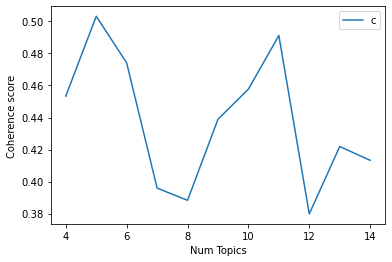

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=4, limit=15, step=1)
# Show graph
limit=15; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 4  has Coherence Value of 0.4534
Num Topics = 5  has Coherence Value of 0.5032
Num Topics = 6  has Coherence Value of 0.4741
Num Topics = 7  has Coherence Value of 0.396
Num Topics = 8  has Coherence Value of 0.3883
Num Topics = 9  has Coherence Value of 0.4389
Num Topics = 10  has Coherence Value of 0.4577
Num Topics = 11  has Coherence Value of 0.4912
Num Topics = 12  has Coherence Value of 0.3798
Num Topics = 13  has Coherence Value of 0.4219
Num Topics = 14  has Coherence Value of 0.4133


## Optimal Model

In [29]:
optimal_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True
                                     
                                       )
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.009*"就业" + 0.009*"比较" + 0.006*"美国" + 0.006*"回国" + 0.006*"数据" + 0.006*"排名" '
  '+ 0.005*"专业" + 0.005*"位置" + 0.004*"留" + 0.004*"地理" + 0.004*"建议" + '
  '0.004*"不错" + 0.003*"金融" + 0.003*"国内" + 0.003*"背景" + 0.003*"谢谢" + 0.003*"本科" '
  '+ 0.003*"综排" + 0.003*"今年" + 0.003*"设置"'),
 (1,
  '0.008*"比较" + 0.005*"位置" + 0.005*"排名" + 0.004*"就业" + 0.004*"专业" + 0.003*"地理" '
  '+ 0.003*"美国" + 0.003*"课" + 0.003*"背景" + 0.003*"回国" + 0.003*"本科" + '
  '0.003*"设置" + 0.002*"今年" + 0.002*"纠" + 0.002*"情况" + 0.002*"留" + 0.002*"建议" + '
  '0.002*"数据" + 0.002*"谢谢" + 0.002*"考虑"'),
 (2,
  '0.007*"课" + 0.006*"比较" + 0.004*"专业" + 0.004*"背景" + 0.004*"数据" + 0.003*"学习" '
  '+ 0.003*"需要" + 0.003*"就业" + 0.003*"美国" + 0.003*"门" + 0.003*"群" + 0.003*"经验" '
  '+ 0.002*"主要" + 0.002*"本科" + 0.002*"相关" + 0.002*"准备" + 0.002*"编程" + '
  '0.002*"读" + 0.002*"教授" + 0.002*"方面"'),
 (3,
  '0.006*"准备" + 0.005*"邮件" + 0.004*"分钟" + 0.003*"官" + 0.003*"推荐" + 0.003*"发" + '
  '0.003*"题" + 0.003*"出" + 0.003*"回答" + 0.003*"次" + 0.002*"信" + 0.002*

In [30]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
vis

/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.143868  0.006126       1        1  34.353181
2      0.040249 -0.066158       2        1  23.782968
3     -0.116123 -0.062071       3        1  16.053819
4     -0.172460  0.065656       4        1  15.984740
1      0.104465  0.056446       5        1   9.825292, topic_info=    Term         Freq        Total Category  logprob  loglift
442   排名  1139.000000  1139.000000  Default  30.0000  30.0000
135   就业  1957.000000  1957.000000  Default  29.0000  29.0000
84    位置  1064.000000  1064.000000  Default  28.0000  28.0000
116   回国  1138.000000  1138.000000  Default  27.0000  27.0000
97    准备  1456.000000  1456.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
473    结    84.135637   549.250719   Topic5  -6.2821   0.4441
72    不错    91.204323   810.371344   Topic5  -6.2014   0.1358
444   数据   101.149986  1475.212265   Topic5  -6.0979  -0.3597
379   一直    85.998436   703.981752   Topic5  -6.2602   0.2178
167   方面    82.902433   649.634023   Topic5  -6.2968   0.2615

[470 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
20951      4  0.146769          (1)
20951      5  0.807229          (1)
19577      1  0.969086          +86
12955      5  0.930780        12/16
9823       1  0.940655           2）
...      ...       ...          ...
20230      1  0.972503  ，ChaseDream
34593      1  0.947797          ，WM
37589      1  0.976480        ：2018
26809      1  0.985360        ：2019
32026      1  0.972798       ：20:00

[1092 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

## Dominant Topic for Each Review

In [31]:
data = df['content_snow'].values.tolist()
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num+1), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.8724,"课, 比较, 专业, 背景, 数据, 学习, 需要, 就业, 美国, 门",SMU Miami deposit deposit 想来 问问 选校 意见 （neu cs ...
1,1,3.0,0.5851,"课, 比较, 专业, 背景, 数据, 学习, 需要, 就业, 美国, 门",Duke 出 offer，decline IMC 季 介绍 特别 感谢 CD， 群群 小伙伴...
2,2,1.0,0.9730,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",美国 新加坡 英国 混 英国 今年 形势 估计 机会 罗村 UCD WUSTL JHU 南洋...
3,3,1.0,0.5951,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",定 UR 专业 后来 补 10% scholarship， 开心 满意 决定 谢谢 CDer...
4,4,1.0,0.5384,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",帮 亲戚 小朋友 DIY 到手 OFFER 隐藏 BG 回复 ）： 游客 查看 本帖 隐藏 ...
5,5,2.0,0.7446,"比较, 位置, 排名, 就业, 专业, 地理, 美国, 课, 背景, 回国",【429 update】 条件 设置 时长 smu rpi 中选 rpi425 幸运 等来 ...
6,6,1.0,0.9962,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",突然 neu 小奖 听说 coop & cpt， 欢迎 小伙伴 科普 ~（ 顺便 群 找到 ...
7,7,3.0,0.7822,"课, 比较, 专业, 背景, 数据, 学习, 需要, 就业, 美国, 门",ddl：28 smu deposit 1k$ （10k$ 小奖 ）214 rpi depos...
8,8,1.0,0.5361,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",已录 拖 久 经验 回馈 CD 攒 人品 。tl:1015 邀请 留位 费 截止 ）BG： ...
9,9,3.0,0.6537,"课, 比较, 专业, 背景, 数据, 学习, 需要, 就业, 美国, 门",早上 罗村 10% 小奖 dream school 拒绝 以后 罗村 期间 CWRU UCO...


In [32]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,1.0,0.9992,"就业, 比较, 美国, 回国, 数据, 排名, 专业, 位置, 留, 地理",# 正文 前 插播 条入 群 提醒 # 扫 扫 添加 咨询 师 老王 微信 进入 Fall ...
1,2.0,0.9988,"比较, 位置, 排名, 就业, 专业, 地理, 美国, 课, 背景, 回国",满意 特别 今年 申爆 背景 楼主 背景 算是 CD 超级 无敌 学渣 妥妥 党 标 配 隔...
2,3.0,0.9997,"课, 比较, 专业, 背景, 数据, 学习, 需要, 就业, 美国, 门",【 未经 允许 转载 】 注 2016Fall 入学 注意 阅读 篇帖 子 时效性 友情 链...
3,4.0,0.9985,"准备, 邮件, 分钟, 官, 推荐, 发, 题, 出, 回答, 次",wustl 2021fall video essay 压线 答 才录 ve， 一共 道 题 ...
4,5.0,0.9980,"准备, 分钟, 题, 题目, 回答, 邀请, 祝, 发, 录, 道",Wake Forest Executive Director John White 入学 说...


In [33]:
from os import path
import os
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# Chinese fonts must be set!!
font_path = d + '/SourceHanSerifSC-VF.otf'
#font_path = d + '/fonts/msyh.ttc'

There are 577905 words in the combination of all content.


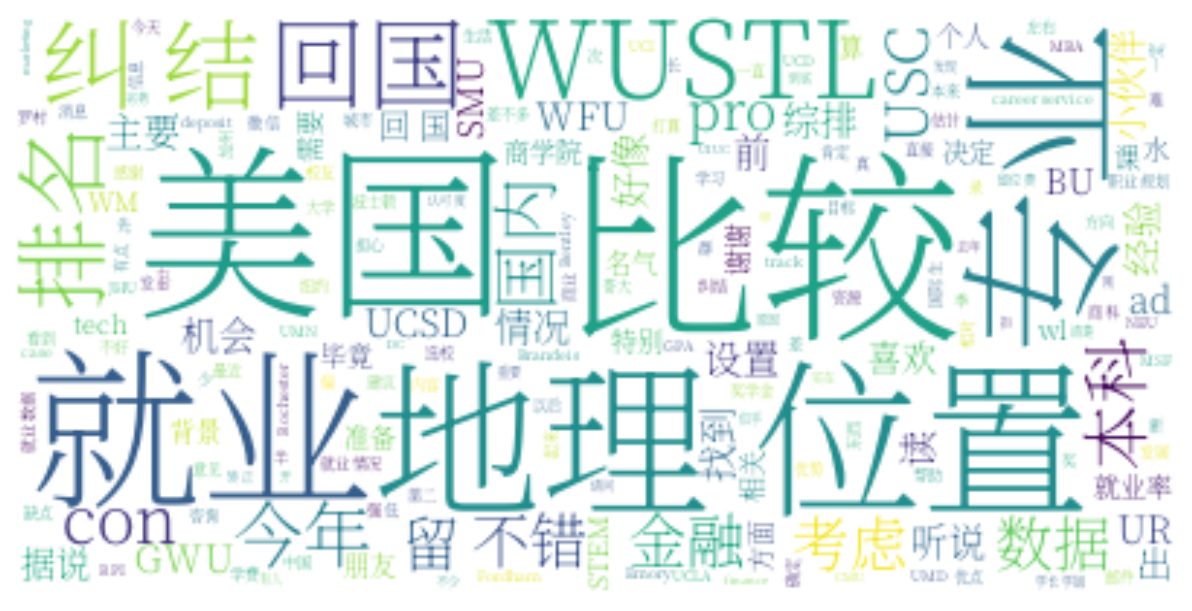

In [34]:
text_1 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==1.0]['Text'])
print ("There are {} words in the combination of all content.".format(len(text_1)))


# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
len(df_dominant_topic[df_dominant_topic['Dominant_Topic']==1.0]['Text'])

There are 210056 words in the combination of all content.


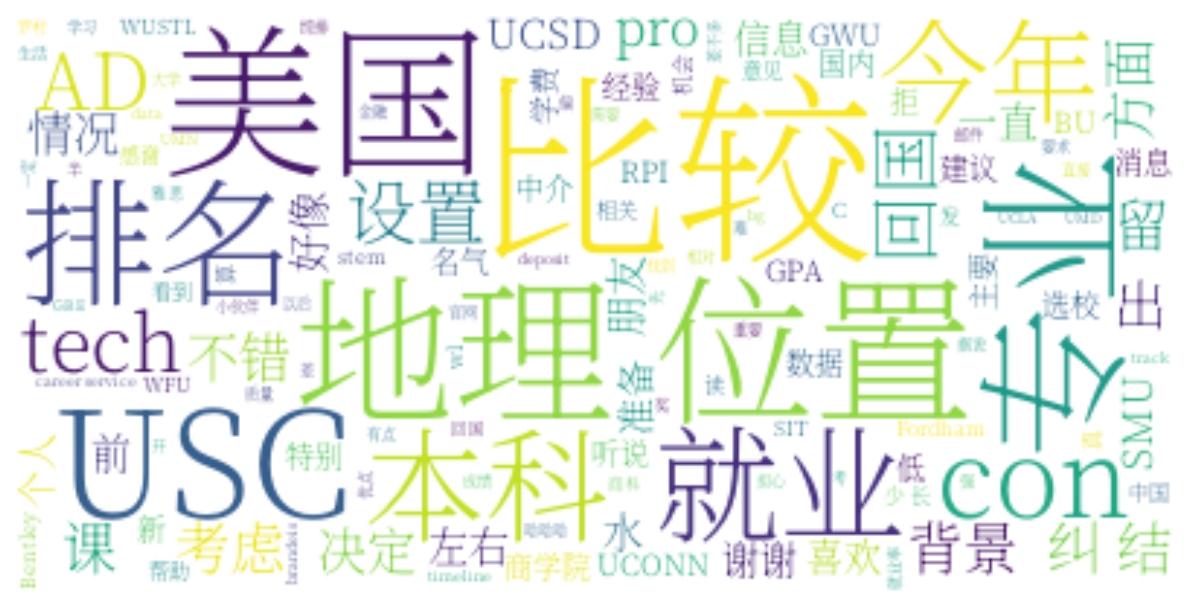

In [35]:
text_2 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==2.0]['Text'])
print ("There are {} words in the combination of all content.".format(len(text_2)))


# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_2)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 425903 words in the combination of all content.


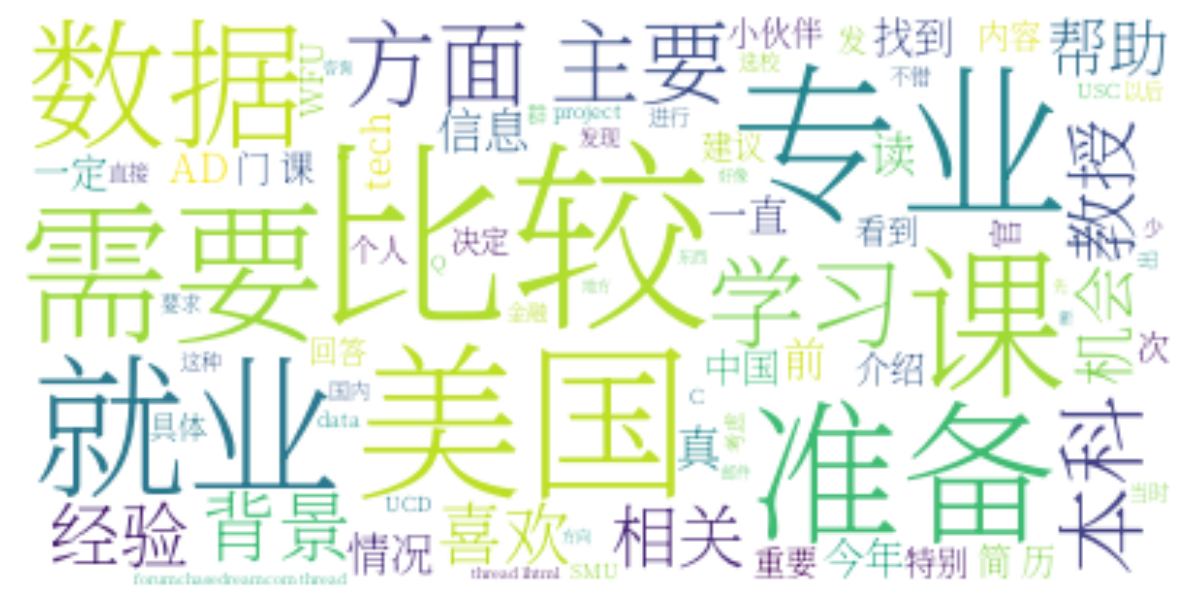

In [36]:
text_3 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==3.0]['Text'])
print ("There are {} words in the combination of all content.".format(len(text_3)))


# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_3)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 333149 words in the combination of all content.


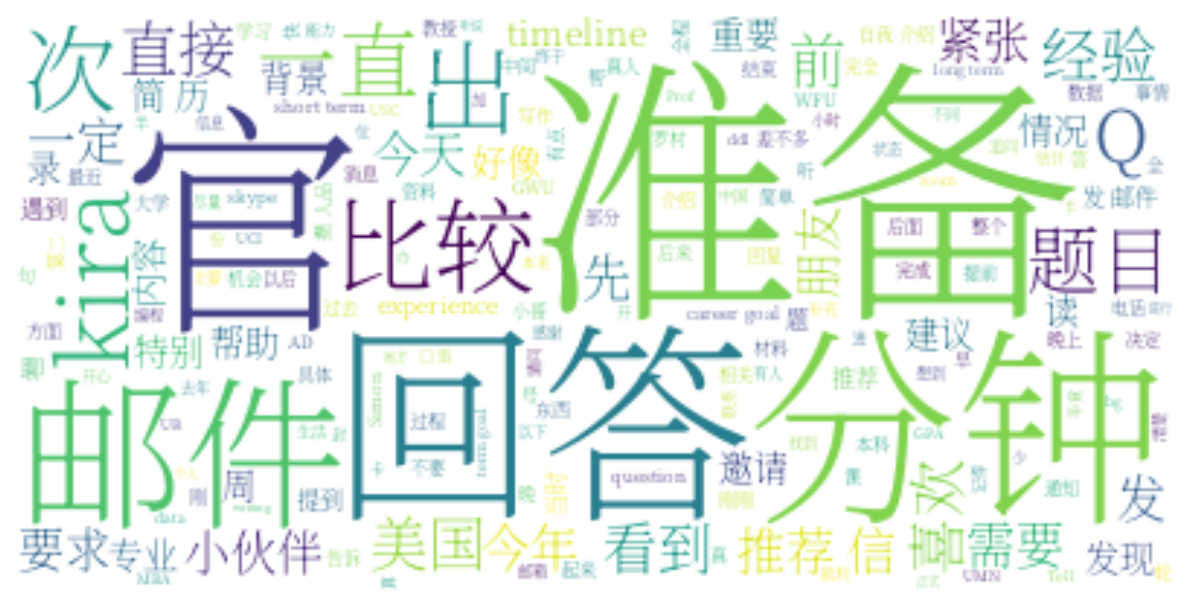

In [37]:
text_4 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==4.0]['Text'])
print ("There are {} words in the combination of all content.".format(len(text_4)))

# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_4)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 363557 words in the combination of all content.


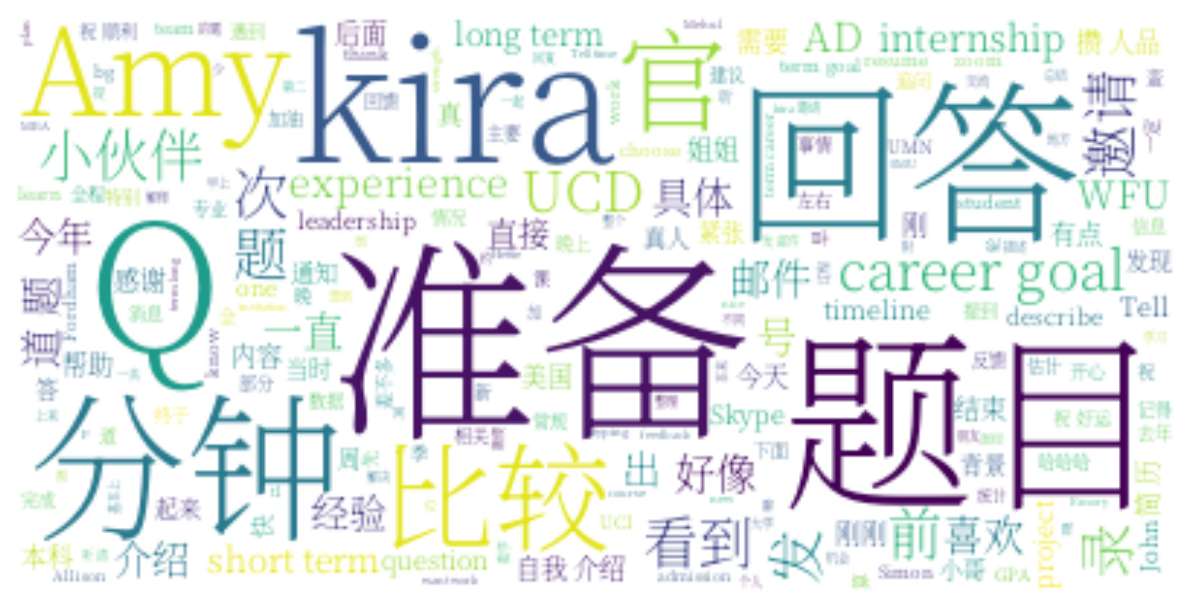

In [38]:
text_5 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==5.0]['Text'])
print ("There are {} words in the combination of all content.".format(len(text_5)))

# Generate a word cloud image
wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_5)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2]:
# text_6 = " ".join(content for content in df_dominant_topic[df_dominant_topic['Dominant_Topic']==6.0]['Text'])
# print ("There are {} words in the combination of all content.".format(len(text_6)))

# # Generate a word cloud image
# wordcloud = WordCloud(font_path=font_path, stopwords=my_stopwords, background_color="white").generate(text_6)

# # Display the generated image:
# # the matplotlib way:
# plt.figure(figsize=(10, 10), dpi=150)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# UCD Sentiment Analysis

In [39]:
ucddf_1 = pd.read_excel('ChaseDreamUCD1_5.xlsx')
ucddf_2 = pd.read_excel('ChaseDreamUCD6_9.xlsx')
ucddf = pd.concat([ucddf_1, ucddf_2], ignore_index = True)
ucddf

,Unnamed: 0,Dates,Titles,Contents,link
0,0,2020-2-1 01:07,美英坡MSBA:UR UCD WUSTL NTU南洋理工选校 - 商学院Master申请区,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,https://forum.chasedream.com/forum.php?mod=vie...
1,1,2018-4-19 07:18,[选校贴] （已定 UCD）EMORY MSBA vs UCDavis MSBA - 商学院...,谢谢各位投票和给建议的小伙伴，最终还是决定去SF追寻互联网梦啦\r\n===========...,https://forum.chasedream.com/forum.php?mod=vie...
2,2,2022-1-18 17:57,"更新申请项目2022Fall (哥大 AA，UCD MSBA, Cornell Tech I...",\n最近一个星期收到了3个面试。分别是有2个真人面试，还有一个是Precorded视频面试。...,https://forum.chasedream.com/forum.php?mod=vie...
3,3,2019-4-9 11:12,【总结+选校】【已定CMU】CMU MISM + MSBA： UCLA + UCD + UC...,拒了UCD决定去CMU了，在等澳洲签证\n\r\n本以为自己会去加州结果去了土澳还是有一点心...,https://forum.chasedream.com/forum.php?mod=vie...
4,4,2022-1-17 17:14,【已录】UCD MSBA 22fall R2 真人面试 with John - 商学院Mas...,\r\nlz之前一直潜水，但是在择校和面经方面受到了CD热心朋友们很大的帮助，于是决定写一篇...,https://forum.chasedream.com/forum.php?mod=vie...
...,...,...,...,...,...
535,235,2019-3-26 00:33,【求选校】UCD MSBA/Rochester MSBA/Tufts Econ/Umich ...,申的比较杂，自己方向也没有想好，初步想留美，本科经济强转BA，没有相关实习经历。\r\nUC...,https://forum.chasedream.com/forum.php?mod=vie...
536,236,2019-1-5 14:05,MSBA 快要交留位费了 WFU WUSTL UCD 求帮助 - 商学院Master申请区,更新一下，因为我托福没上105，所以戴维斯要求我研究生毕业前要么托福105 or 写作口语小...,https://forum.chasedream.com/forum.php?mod=vie...
537,237,2019-3-14 02:46,（3.7）ucd kira talent 面筋 [2019-03-07] - 商学院Mast...,\r\n楼主3月7日，两场面试，一个通过zoom与罗村面试（拿到offer），一个就是和uc...,https://forum.chasedream.com/forum.php?mod=vie...
538,238,2018-1-30 21:09,msba选校 ucd/wustl/duke - 商学院Master申请区,非常纠结的楼主真诚的希望cder能给我提一些选校意见，ucd两周后deposit ddl，w...,https://forum.chasedream.com/forum.php?mod=vie...


In [40]:
def snow_senti_scores(content):
    sent = SnowNLP(content).sentences
    scores = []
    for sen in sent:
        s = SnowNLP(sen)
        scores.append(s.sentiments)
    return np.average(scores)


ucddf['content_score'] = ucddf['Contents'].map(lambda x: snow_senti_scores(x))
ucddf

/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Unnamed: 0,Dates,Titles,Contents,link,content_score
0,0,2020-2-1 01:07,美英坡MSBA:UR UCD WUSTL NTU南洋理工选校 - 商学院Master申请区,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,https://forum.chasedream.com/forum.php?mod=vie...,0.601643
1,1,2018-4-19 07:18,[选校贴] （已定 UCD）EMORY MSBA vs UCDavis MSBA - 商学院...,谢谢各位投票和给建议的小伙伴，最终还是决定去SF追寻互联网梦啦\r\n===========...,https://forum.chasedream.com/forum.php?mod=vie...,0.575877
2,2,2022-1-18 17:57,"更新申请项目2022Fall (哥大 AA，UCD MSBA, Cornell Tech I...",\n最近一个星期收到了3个面试。分别是有2个真人面试，还有一个是Precorded视频面试。...,https://forum.chasedream.com/forum.php?mod=vie...,0.523114
3,3,2019-4-9 11:12,【总结+选校】【已定CMU】CMU MISM + MSBA： UCLA + UCD + UC...,拒了UCD决定去CMU了，在等澳洲签证\n\r\n本以为自己会去加州结果去了土澳还是有一点心...,https://forum.chasedream.com/forum.php?mod=vie...,0.523373
4,4,2022-1-17 17:14,【已录】UCD MSBA 22fall R2 真人面试 with John - 商学院Mas...,\r\nlz之前一直潜水，但是在择校和面经方面受到了CD热心朋友们很大的帮助，于是决定写一篇...,https://forum.chasedream.com/forum.php?mod=vie...,0.570714
...,...,...,...,...,...,...
535,235,2019-3-26 00:33,【求选校】UCD MSBA/Rochester MSBA/Tufts Econ/Umich ...,申的比较杂，自己方向也没有想好，初步想留美，本科经济强转BA，没有相关实习经历。\r\nUC...,https://forum.chasedream.com/forum.php?mod=vie...,0.591878
536,236,2019-1-5 14:05,MSBA 快要交留位费了 WFU WUSTL UCD 求帮助 - 商学院Master申请区,更新一下，因为我托福没上105，所以戴维斯要求我研究生毕业前要么托福105 or 写作口语小...,https://forum.chasedream.com/forum.php?mod=vie...,0.608572
537,237,2019-3-14 02:46,（3.7）ucd kira talent 面筋 [2019-03-07] - 商学院Mast...,\r\n楼主3月7日，两场面试，一个通过zoom与罗村面试（拿到offer），一个就是和uc...,https://forum.chasedream.com/forum.php?mod=vie...,0.571554
538,238,2018-1-30 21:09,msba选校 ucd/wustl/duke - 商学院Master申请区,非常纠结的楼主真诚的希望cder能给我提一些选校意见，ucd两周后deposit ddl，w...,https://forum.chasedream.com/forum.php?mod=vie...,0.657063


/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ethanmeng/opt/anaconda3/envs/environment/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import

In [41]:
ucddf.drop('Unnamed: 0', inplace=True, axis=1)
ucddf['Dates'] = pd.to_datetime(ucddf['Dates'], format='%Y-%m-%d %H:%M')
ucddf

,Dates,Titles,Contents,link,content_score
0,2020-02-01 01:07:00,美英坡MSBA:UR UCD WUSTL NTU南洋理工选校 - 商学院Master申请区,我是美国新加坡英国混申，英国今年的形势估计机会不太大就不说了，现在是有罗村 UCD WUST...,https://forum.chasedream.com/forum.php?mod=vie...,0.601643
1,2018-04-19 07:18:00,[选校贴] （已定 UCD）EMORY MSBA vs UCDavis MSBA - 商学院...,谢谢各位投票和给建议的小伙伴，最终还是决定去SF追寻互联网梦啦\r\n===========...,https://forum.chasedream.com/forum.php?mod=vie...,0.575877
2,2022-01-18 17:57:00,"更新申请项目2022Fall (哥大 AA，UCD MSBA, Cornell Tech I...",\n最近一个星期收到了3个面试。分别是有2个真人面试，还有一个是Precorded视频面试。...,https://forum.chasedream.com/forum.php?mod=vie...,0.523114
3,2019-04-09 11:12:00,【总结+选校】【已定CMU】CMU MISM + MSBA： UCLA + UCD + UC...,拒了UCD决定去CMU了，在等澳洲签证\n\r\n本以为自己会去加州结果去了土澳还是有一点心...,https://forum.chasedream.com/forum.php?mod=vie...,0.523373
4,2022-01-17 17:14:00,【已录】UCD MSBA 22fall R2 真人面试 with John - 商学院Mas...,\r\nlz之前一直潜水，但是在择校和面经方面受到了CD热心朋友们很大的帮助，于是决定写一篇...,https://forum.chasedream.com/forum.php?mod=vie...,0.570714
...,...,...,...,...,...
535,2019-03-26 00:33:00,【求选校】UCD MSBA/Rochester MSBA/Tufts Econ/Umich ...,申的比较杂，自己方向也没有想好，初步想留美，本科经济强转BA，没有相关实习经历。\r\nUC...,https://forum.chasedream.com/forum.php?mod=vie...,0.591878
536,2019-01-05 14:05:00,MSBA 快要交留位费了 WFU WUSTL UCD 求帮助 - 商学院Master申请区,更新一下，因为我托福没上105，所以戴维斯要求我研究生毕业前要么托福105 or 写作口语小...,https://forum.chasedream.com/forum.php?mod=vie...,0.608572
537,2019-03-14 02:46:00,（3.7）ucd kira talent 面筋 [2019-03-07] - 商学院Mast...,\r\n楼主3月7日，两场面试，一个通过zoom与罗村面试（拿到offer），一个就是和uc...,https://forum.chasedream.com/forum.php?mod=vie...,0.571554
538,2018-01-30 21:09:00,msba选校 ucd/wustl/duke - 商学院Master申请区,非常纠结的楼主真诚的希望cder能给我提一些选校意见，ucd两周后deposit ddl，w...,https://forum.chasedream.com/forum.php?mod=vie...,0.657063


In [42]:
ucddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Dates          540 non-null    datetime64[ns]
 1   Titles         540 non-null    object        
 2   Contents       540 non-null    object        
 3   link           540 non-null    object        
 4   content_score  534 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 21.2+ KB


In [43]:
ucddf.to_csv('ChaseDreamUCDAllInfo.csv')

In [44]:
df_dates = ucddf.groupby([ucddf['Dates'].dt.date]).mean('content_score')
df_dates = df_dates[2:df_dates.shape[0]]

array([[<AxesSubplot:title={'center':'content_score'}>]], dtype=object)

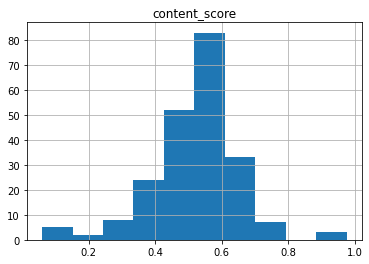

In [45]:
df_dates.hist()

In [46]:
ucddf_year = ucddf.groupby([ucddf['Dates'].dt.year]).mean('content_score')
ucddf_year

,content_score
Dates,
2011,0.392388
2015,0.586480
2016,0.606691
2017,0.577906
2018,0.535174
2019,0.512756
2020,0.540554
2021,0.492147
2022,0.556723


In [48]:
ucdcountdf_year = df.groupby([ucddf['Dates'].dt.year]).count()
ucdcountdf_year = ucdcountdf_year['Contents']
ucdcountdf_year

Dates
2011.0      2
2015.0      2
2016.0      4
2017.0      9
2018.0     43
2019.0    174
2020.0    215
2021.0     84
2022.0      6
Name: Contents, dtype: int64

<AxesSubplot:xlabel='Dates'>

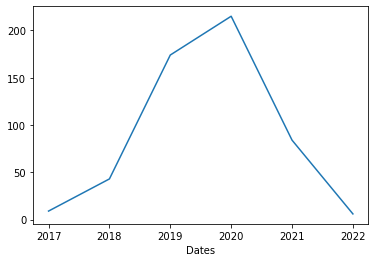

In [49]:
ucdcountdf_year.drop([2011,2015,2016], axis = 0).plot()

<AxesSubplot:xlabel='Dates'>

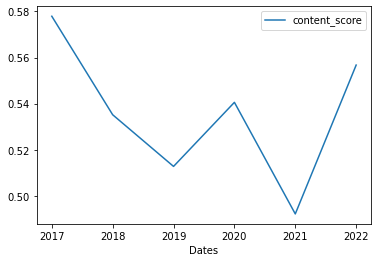

In [53]:
ucddf_year.drop([2011,2015,2016], axis = 0).plot()

In [50]:
ucddf_month = ucddf.groupby([ucddf['Dates'].dt.month]).mean('content_score')
ucddf_month

,content_score
Dates,
1,0.554068
2,0.490533
3,0.542735
4,0.542152
5,0.508521
6,0.476360
7,0.434969
8,0.660356
10,0.516289


In [51]:
ucdcountdf_month = df.groupby([ucddf['Dates'].dt.month]).count()
ucdcountdf_month = ucdcountdf_month['Contents']
ucdcountdf_month

Dates
1.0      88
2.0     126
3.0     132
4.0      63
5.0      22
6.0       5
7.0       2
8.0       2
10.0     12
11.0     32
12.0     55
Name: Contents, dtype: int64

<AxesSubplot:xlabel='Dates'>

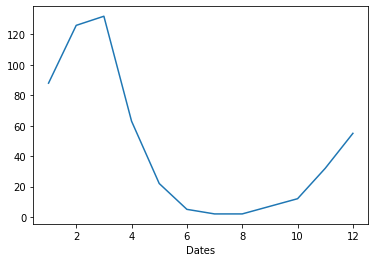

In [52]:
ucdcountdf_month.plot()

<AxesSubplot:xlabel='Dates'>

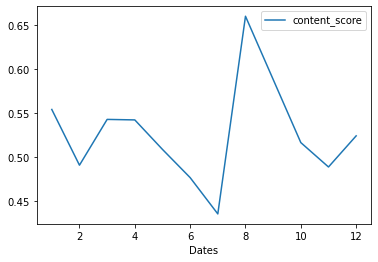

In [54]:
ucddf_month.plot()